### Step 1. Open the data file and have a look at the general information. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import SnowballStemmer
english_stemmer = SnowballStemmer('english')
from scipy import stats as st
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


None

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

duplicate rows: 54


Text(0.5, 1.0, 'Heatmap nulity correlation')

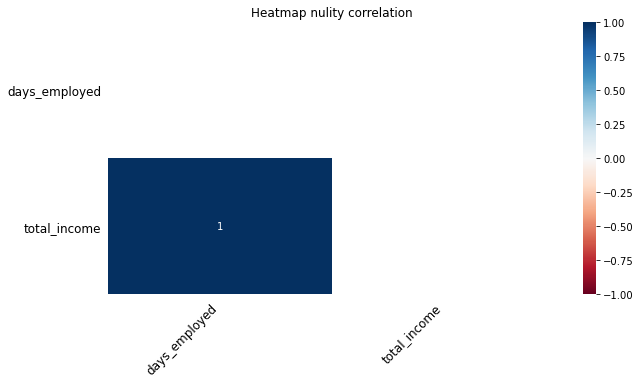

In [2]:
credit_score=pd.read_csv('credit_scoring_eng.csv') #credit_score is the main dataframe 
display(credit_score.info())
display(credit_score.head(10))
display(credit_score.isnull().sum())


#checking duplicates in dataframe
print('duplicate rows:',credit_score.duplicated().sum())

#checking missingness relation
#msno.dendrogram(games_df)
msno.heatmap(credit_score,figsize=(10,5), fontsize=12)
plt.title('Heatmap nulity correlation')

### Step 2. Data preprocessing

### Processing missing values

In [3]:
#dealing with null values
missing_list=[]
for x in credit_score:
    if len(credit_score[credit_score[x].isnull()])>0:
        missing_list.append(x)
print(missing_list)

missing_perc=[]
for x in missing_list:
    missing_perc.append([x,(len(credit_score[credit_score[x].isnull()])/len(credit_score))])
missing_perc=pd.DataFrame(missing_perc,columns=['column','missing %'])
display(missing_perc.sort_values(by=['missing %'],ascending=False))

#There is  also negative employee days in days_employed column which has been converted to positive days using abs()
credit_score['days_employed'] = credit_score['days_employed'].abs() 
display(credit_score.head(10))

['days_employed', 'total_income']


,column,missing %
0,days_employed,0.100999
1,total_income,0.100999


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


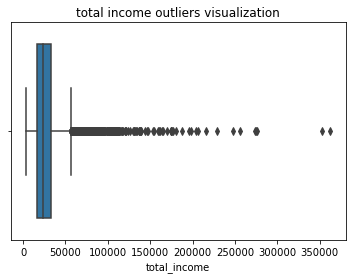

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

In [4]:
#checking outliers in the total income column and null values is filled with median according to income_type and education column
sns.boxplot(x = credit_score['total_income'])
plt.title('total income outliers visualization')
plt.show()
credit_score['total_income'] = credit_score.groupby(['education','income_type'])['total_income'].transform(lambda x: x.fillna(x.median()))
display(credit_score.isnull().sum())

count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

array([ 1,  0,  3,  2,  4, 20,  5], dtype=int64)

count    21525.000000
mean         0.543275
std          1.379876
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

2.5
-1.5


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house


children               0
days_employed       2121
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21069.000000,18948.000000,21069.000000,21069.000000,21069.000000,21069.000000,21069.000000
mean,0.425981,68027.435850,43.424462,0.816935,0.983246,0.080782,26423.515607
std,0.663035,139962.254159,12.621562,0.547832,1.426296,0.272507,15684.433766
min,0.000000,24.141633,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,929.685077,33.000000,1.000000,0.000000,0.000000,17190.397000
50%,0.000000,2205.209060,43.000000,1.000000,0.000000,0.000000,22880.622000
75%,1.000000,5676.753892,54.000000,1.000000,1.000000,0.000000,31653.350000
max,2.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


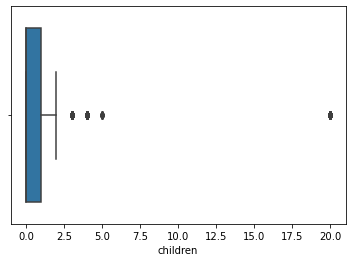

In [5]:
#checking outliers in the children column
display(credit_score['children'].describe())

#negative children number convert to positive number
credit_score['children'] = credit_score['children'].replace(-1,1)
display(credit_score['children'].unique())
display(credit_score['children'].describe())
sns.boxplot(x = credit_score['children'])
upper_1 = (credit_score['children'].quantile(0.75))+(1.5*((credit_score['children'].quantile(0.75))-(credit_score['children'].quantile(0.25))))
lower_1 = (credit_score['children'].quantile(0.25))-(1.5*((credit_score['children'].quantile(0.75))-(credit_score['children'].quantile(0.25))))
print(upper_1)
print(lower_1)
credit_score = credit_score.query('children >= @lower_1 & children <= @upper_1 ')
display(credit_score.head())
display(credit_score.isnull().sum())
display(credit_score.describe())

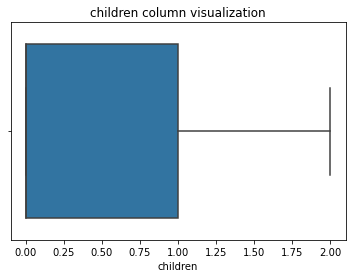

In [6]:
sns.boxplot(x = credit_score['children'])
plt.title('children column visualization')
plt.show()

### Data type replacement

In [7]:
try:
    credit_score['education_id']= credit_score['education_id'].astype(str)
                                                
except:
    print('there is no error in education_id')
    
try:
    credit_score['family_status_id']= credit_score['family_status_id'].astype(str)
                                                
except:
    print('there is no error in family_status')

credit_score.dtypes
    


children              int64
days_employed       float64
dob_years             int64
education            object
education_id         object
family_status        object
family_status_id     object
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

### Categorizing Data

In [8]:
# categorize loan purposes using lemmatization
def purpose_category(value):
         stemmed_list=[english_stemmer.stem(i) for i in value.split(' ')]
         if 'wed' in stemmed_list:
            return 'wedding'
         elif 'properti' in stemmed_list:
            return 'property'
         elif 'hous'in stemmed_list:
            return 'house'
         elif 'univers' in  stemmed_list:
            return 'education'
         elif 'educ' in  stemmed_list:
            return 'education'
         elif 'car' in  stemmed_list:
            return 'car'
         else:
            return 'real estate'
            
credit_score['purpose']= credit_score['purpose'].apply(purpose_category)
print(credit_score['purpose'].value_counts())


real estate    4386
car            4227
education      3930
house          3733
property       2490
wedding        2303
Name: purpose, dtype: int64


In [9]:
def income_group_defaulter(row):
    """
    The function returns the income group according to the total_income and whether they have defaulted or not, 
    using the following rules:
    —' low income non defaulters'  for total_income <= 17000 and default status 0
    - 'low income defaulters ' for total_income <= 17000 and default status 0
    —'low middle income non defaulters ' for 17000< income <= 23000
    - 'low middle income  defaulters ' for 17000< income <= 23000
     —'high middle income non defaulters' for 23000< income <= 32000
     - high middle income defaulters' 
    —'high income non defaulters for all other cases
    - high income defaulters
    """
    total_income = row['total_income']
    debt = row['debt']
    
    if total_income <= 17000:
        if debt == 0:
            return 'low income non defaulters'
        return 'low income defaulters'
        
    if total_income <= 23000:
        if debt == 0:
            return 'low middle income non defaulters'
        return 'low middle income defaulters'
        
    if total_income <= 32000:
        if debt == 0:
            return 'high middle income non defaulters'
        return 'high middle income defaulters'
        
    if total_income > 32000:
        if debt == 0:
            return 'high income non defaulters'
        return 'high income defaulters' 

credit_score['borrwer category'] = credit_score.apply(income_group_defaulter, axis=1 ).sort_values(ascending=False)
display(credit_score.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,borrwer category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,house,high income non defaulters
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car,low middle income non defaulters
2,0,5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,house,high middle income non defaulters
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,high middle income non defaulters
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,house,high income non defaulters


### Step 3. Answer these questions?

### Q.1 : Is there a relation between having kids and repaying a loan on time?

,total_defaulted_loan,total_number_of_loan,loan defaulter ratio percentage
children,,,
0,1063,14149,7.512898
1,445,4865,9.146968
2,194,2055,9.440389


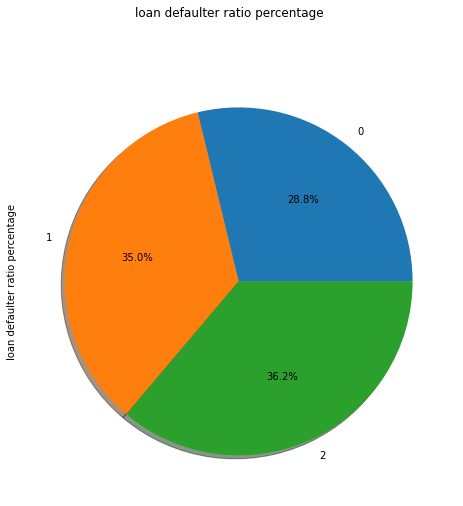

In [10]:
credit_score_pivot_children = credit_score.pivot_table(index='children', values='debt', aggfunc=['sum','count'])
credit_score_pivot_children.columns=['total_defaulted_loan','total_number_of_loan']
credit_score_pivot_children['loan defaulter ratio percentage'] = (credit_score_pivot_children["total_defaulted_loan"] / credit_score_pivot_children["total_number_of_loan"])*100
display(credit_score_pivot_children)
credit_score_pivot_children['loan defaulter ratio percentage'].plot(kind='pie', style='o',subplots=True, shadow = True, figsize=(10,8),autopct='%1.1f%%',title="loan defaulter ratio percentage")
plt.show()

#### Answer: Higher number of children have loan default ratio percentage and for lower vice versa.

### Q.2: Is there a relation between marital status and repaying a loan on time?

,total_defaulted_loan,total_number_of_loan,loan defaulter ratio percentage
family_status,,,
civil partnership,377,4099,9.197365
divorced,83,1181,7.027942
married,908,12046,7.537772
unmarried,271,2794,9.699356
widow / widower,63,949,6.638567


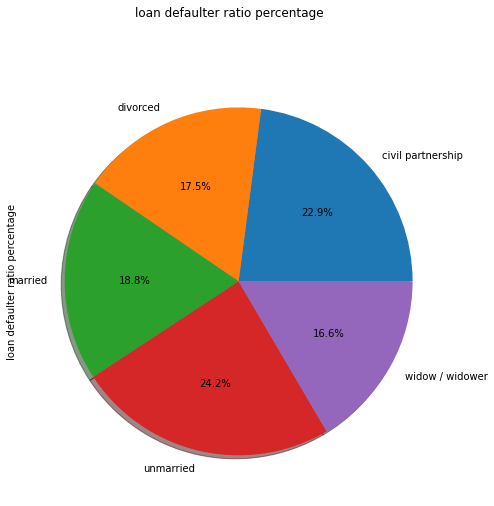

In [11]:
credit_score_pivot_marital_status = credit_score.pivot_table(index='family_status', values='debt', aggfunc=['sum','count'])
credit_score_pivot_marital_status.columns=['total_defaulted_loan','total_number_of_loan']
credit_score_pivot_marital_status['loan defaulter ratio percentage'] = (credit_score_pivot_marital_status['total_defaulted_loan'] / credit_score_pivot_marital_status['total_number_of_loan'])*100
display(credit_score_pivot_marital_status)
credit_score_pivot_marital_status['loan defaulter ratio percentage'].plot(kind='pie', style='o',subplots=True, shadow = True, figsize=(10,8),autopct='%1.1f%%',title="loan defaulter ratio percentage")
plt.show()

#### Answer: Unmarried people and civil partner have higher loan default percentage and widow people have lower loan default percentage.Unmarried people have more default loan percentage than married people.

### Q.3: Is there a relation between income level and repaying a loan on time?

,total_defaulted_loan,total_number_of_loan,loan_defaulter_ratio_percentage
borrwer category,,,
high income defaulters,359,359,100.0
high income non defaulters,0,4767,0.0
high middle income defaulters,448,448,100.0
high middle income non defaulters,0,4878,0.0
low income defaulters,400,400,100.0
low income non defaulters,0,4736,0.0
low middle income defaulters,495,495,100.0
low middle income non defaulters,0,4986,0.0


,total_defaulted_loan,total_number_of_loan,loan_defaulter_ratio_percentage
borrwer category,,,
high income defaulters,359,359,100.0
high middle income defaulters,448,448,100.0
low income defaulters,400,400,100.0
low middle income defaulters,495,495,100.0


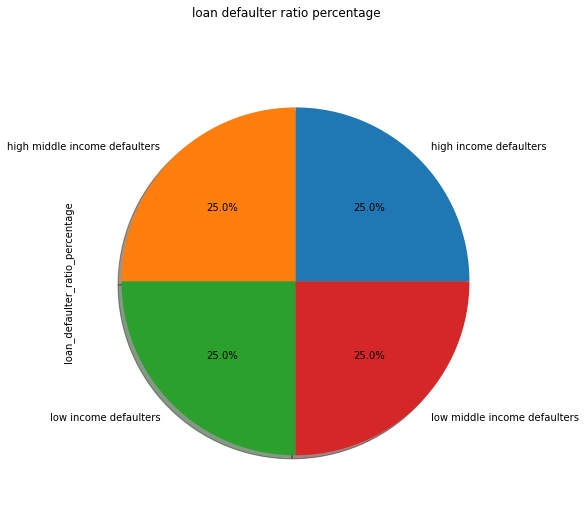

In [12]:
credit_score_pivot_income_level = credit_score.pivot_table(index='borrwer category', values='debt', aggfunc=['sum','count'])
credit_score_pivot_income_level.columns=['total_defaulted_loan','total_number_of_loan']
credit_score_pivot_income_level['loan_defaulter_ratio_percentage'] = (credit_score_pivot_income_level['total_defaulted_loan'] / credit_score_pivot_income_level['total_number_of_loan'])*100
display(credit_score_pivot_income_level)
df=credit_score_pivot_income_level.query('loan_defaulter_ratio_percentage!=0.0 ')
display(df)
df['loan_defaulter_ratio_percentage'].plot(kind='pie', style='o',subplots=True, shadow = True, figsize=(10,8),autopct='%1.1f%%',title="loan defaulter ratio percentage")
plt.show()

#### Answer: All income level non defaulters have chance to repay loan on time.

### Q.4: How do different loan purposes affect on-time repayment of the loan?

,total_defaulted_loan,total_number_of_loan,loan defaulter ratio percentage
purpose,,,
car,395,4227,9.344689
education,365,3930,9.287532
house,248,3733,6.643450
property,187,2490,7.510040
real estate,329,4386,7.501140
wedding,178,2303,7.729049


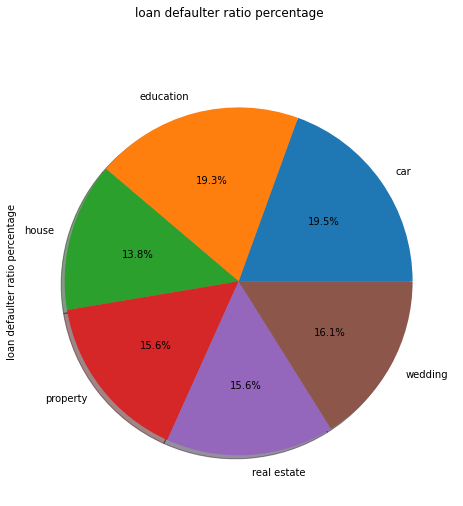

In [13]:
credit_score_pivot_purpose_loan = credit_score.pivot_table(index='purpose', values='debt', aggfunc=['sum','count'])
credit_score_pivot_purpose_loan.columns=['total_defaulted_loan','total_number_of_loan']
credit_score_pivot_purpose_loan['loan defaulter ratio percentage'] = (credit_score_pivot_purpose_loan['total_defaulted_loan'] / credit_score_pivot_purpose_loan['total_number_of_loan'])*100
display(credit_score_pivot_purpose_loan)
credit_score_pivot_purpose_loan['loan defaulter ratio percentage'].plot(kind='pie', style='o',subplots=True, shadow = True, figsize=(10,8),autopct='%1.1f%%',title="loan defaulter ratio percentage")
plt.show()

#### Answer: Car and education loan have bad review to repay loan in time.House loan is at safest position.

### Suggestion to prepare credit score:

1. Higher number of children have loan default ratio percentage and for lower vice versa.
2. Unmarried people and civil partner have higher loan default percentage and widow people have lower loan default percentage.Unmarried people have more default loan percentage than married people.
3. All income level non defaulters have chance to repay loan on time.
4. Car and education loan have bad review to repay loan in time.House loan is at safest position.

#### After analyzing the whole data set and calculating loan default percentage, the potential customers are working widow people who want house loan with having no children and no debts.
